# Flor Iris con K-means

- author: Virginia Ordoño Bernier 
- April 2024

Utiliza el algoritmo K-Means para agrupar los datos de dataset Iris y visualiza los resultados gráficamente.

- Averigua el número de clusters óptimo utilizando Elbow y BIC.
- Visualiza los resultados utilizando un gráfico de dispersión. Cada punto en el gráfico debe ser coloreado de acuerdo con el cluster al que pertenece.
- Comprueba si este resultado coincide con la agrupación real. 
-  A la hora de visualizar los datos, para tener solo dos dimensiones en el gráfico, usa los valores del pétalo para un gráfico y los del sépalo para otro.

## 1. Carga de datos local

In [1]:
import sys
sys.path.append('./')
from my_utils import *

from sklearn import datasets # type: ignore
import pandas as pd # type: ignore

iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.columns = [col.replace(' (cm)', '') for col in df.columns]
df.columns = [col.replace(' ', '_') for col in df.columns]

## 2. Visualización de la distribución de los datos

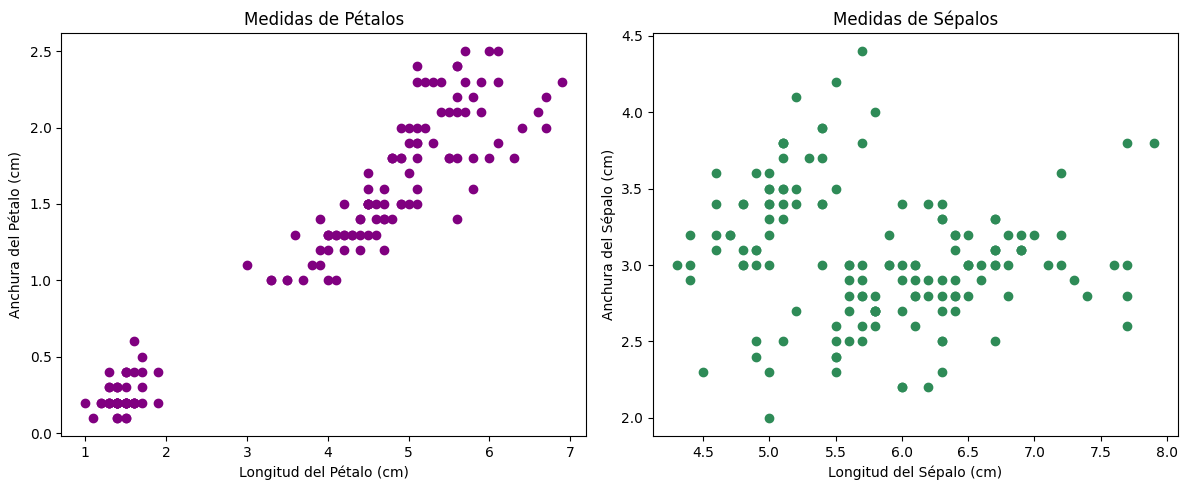

In [2]:
import matplotlib.pyplot as plt # type: ignore

# Crear una figura con dos subplots horizontales
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(12, 5)  # Establecer el tamaño de la figura

# Gráfica de dispersión de las medidas de pétalos en el segundo subplot (ax2)
ax1.scatter(df['petal_length'], df['petal_width'], color='purple')
ax1.set_xlabel('Longitud del Pétalo (cm)')
ax1.set_ylabel('Anchura del Pétalo (cm)')
ax1.set_title('Medidas de Pétalos')

# Gráfica de dispersión de las medidas de sépalos en el primer subplot (ax1)
ax2.scatter(df['sepal_length'], df['sepal_width'], color='seagreen')
ax2.set_xlabel('Longitud del Sépalo (cm)')
ax2.set_ylabel('Anchura del Sépalo (cm)')
ax2.set_title('Medidas de Sépalos')

plt.tight_layout()
plt.show()

## 3. Gráficos BIC y Elbow

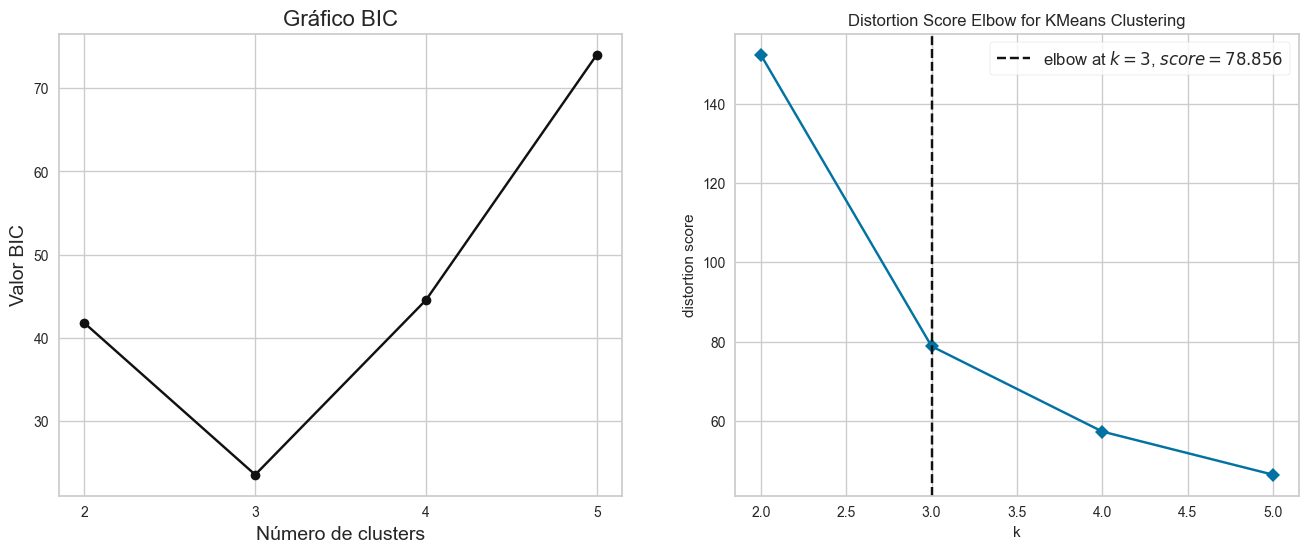

<Figure size 800x550 with 0 Axes>

Mejor k según BIC: 3
Mejor k según Elbow: 3


In [3]:
import matplotlib.pyplot as plt # type: ignore
import numpy as np # type: ignore
from sklearn.cluster import KMeans # type: ignore
from yellowbrick.cluster import KElbowVisualizer # type: ignore

bic_array = []
K_MAX = 5
K_MIN = 2
N_INIT = 20
RANDOM_STATE= 42

for k in range(K_MIN, K_MAX+1):
    model_bic = KMeans(n_clusters=k, n_init=N_INIT, random_state=RANDOM_STATE)
    groups_bic = model_bic.fit_predict(df)
    bic_array.append(get_bic_values(k, groups_bic, df.values))
        
# Visualización de los resultados con BIC 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(np.arange(K_MIN, K_MAX+1), bic_array, "ko-")
ax1.set_xticks(range(K_MIN, K_MAX+1))
ax1.set_title("Gráfico BIC", fontsize=16)
ax1.set_xlabel("Número de clusters", fontsize=14)
ax1.set_ylabel("Valor BIC", fontsize=14)

# Visualización de los resultados con Elbow Method
elbow_method = KElbowVisualizer(KMeans(random_state=RANDOM_STATE), k=K_MAX, timings=False)
elbow_method.fit(df)
elbow_method.show()

plt.tight_layout()
plt.show()

# Leyendas

# Obtiene el número óptimo de clusters según el método BIC
k_bic = np.argmin(bic_array) + K_MIN

# Obtiene el número óptimo de clusters según el método del codo
k_elbow = elbow_method.elbow_value_

print(f"Mejor k según BIC: {k_bic}")
print(f"Mejor k según Elbow: {k_elbow}")

## 4. Modelo K-means con los mejores parámetros

In [5]:
model = KMeans(n_clusters=k_bic, n_init=10, random_state=100, verbose=1)
groups = model.fit_predict(df)

Initialization complete
Iteration 0, inertia 114.49.
Iteration 1, inertia 84.71232984452897.
Iteration 2, inertia 84.01277888865147.
Iteration 3, inertia 83.04698186876973.
Iteration 4, inertia 81.74960206772619.
Iteration 5, inertia 80.80637600000001.
Iteration 6, inertia 79.87357983461303.
Iteration 7, inertia 79.34436414532674.
Iteration 8, inertia 78.92130972222222.
Iteration 9, inertia 78.8556658259773.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 126.18999999999998.
Iteration 1, inertia 94.21924136166126.
Iteration 2, inertia 86.42471169253972.
Iteration 3, inertia 84.49193138509841.
Iteration 4, inertia 83.5791139457432.
Iteration 5, inertia 82.72701093072979.
Iteration 6, inertia 81.54360278471788.
Iteration 7, inertia 80.80637600000001.
Iteration 8, inertia 79.87357983461303.
Iteration 9, inertia 79.34436414532674.
Iteration 10, inertia 78.92130972222222.
Iteration 11, inertia 78.8556658259773.
Converged at iteration 11: strict con

### 3.1. Cálculo de la inertia y los centroides

In [6]:
print(f'Inertia: {model.inertia_}\n')

centroids = model.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=df.columns[:model.cluster_centers_.shape[1]])
centroids_df['cluster'] = range(centroids.shape[0])  # Añade una columna 'cluster' con los índices de los centroides

print('Centroides:')
print('-'*15)
centroids_df

Inertia: 78.85144142614601

Centroides:
---------------


,sepal_length,sepal_width,petal_length,petal_width,cluster
0,6.850000,3.073684,5.742105,2.071053,0
1,5.006000,3.428000,1.462000,0.246000,1
2,5.901613,2.748387,4.393548,1.433871,2


## 5. Visualización modelo Kmeans vs. datos etiquetados 

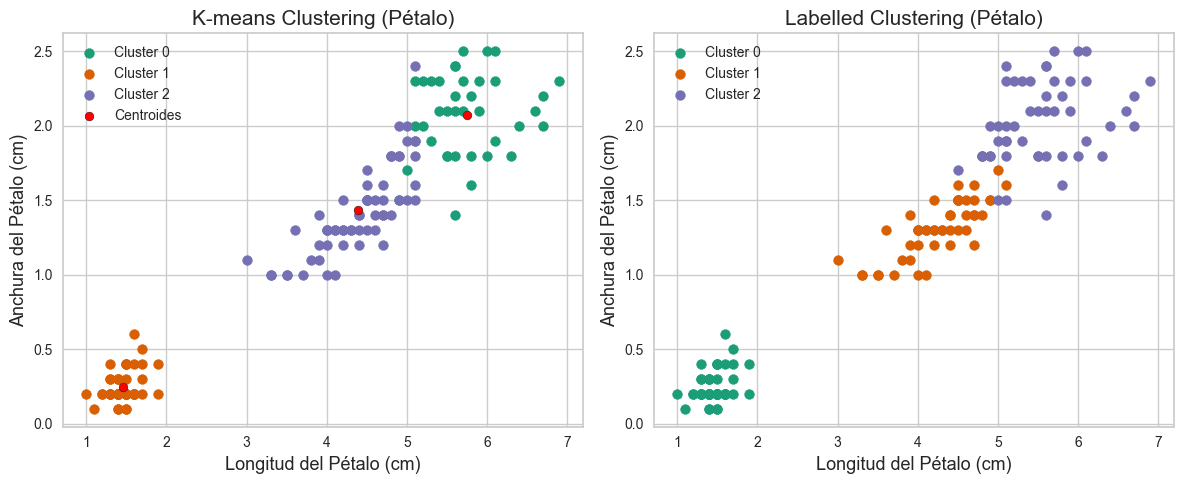

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
colors = plt.colormaps['Dark2']
unique_labels = set(groups)

# Gráfico 1. KMEANS
for i, label_value in enumerate(unique_labels):
    cluster_mask = (groups == label_value)
    ax1.scatter(df.loc[cluster_mask, "petal_length"], df.loc[cluster_mask, "petal_width"], color=colors(i), label=f'Cluster {label_value}', s=50)

ax1.scatter(centroids[:, 2], centroids[:, 3], marker='o', s=40, color='red', edgecolor='k', label='Centroides')

ax1.set_title("K-means Clustering (Pétalo)", fontsize=15)
ax1.set_xlabel('Longitud del Pétalo (cm)', fontsize=13)
ax1.set_ylabel('Anchura del Pétalo (cm)', fontsize=13)
ax1.grid(True)
ax1.legend()

# Gráfico 2. Datos con etiquetas de cluster
# Ajustar las etiquetas para que coincidan con las del modelo
labels = iris.target
# Gráfico 2. Datos con etiquetas de cluster
unique_labels = set(labels)

for i, label in enumerate(unique_labels):
    cluster_mask = (labels == label)
    ax2.scatter(df.loc[cluster_mask, "petal_length"], df.loc[cluster_mask, "petal_width"], color=colors(i), label=f'Cluster {label}', s=50)

ax2.set_title("Labelled Clustering (Pétalo)", fontsize=15)
ax2.set_xlabel('Longitud del Pétalo (cm)', fontsize=13)
ax2.set_ylabel('Anchura del Pétalo (cm)', fontsize=13)
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

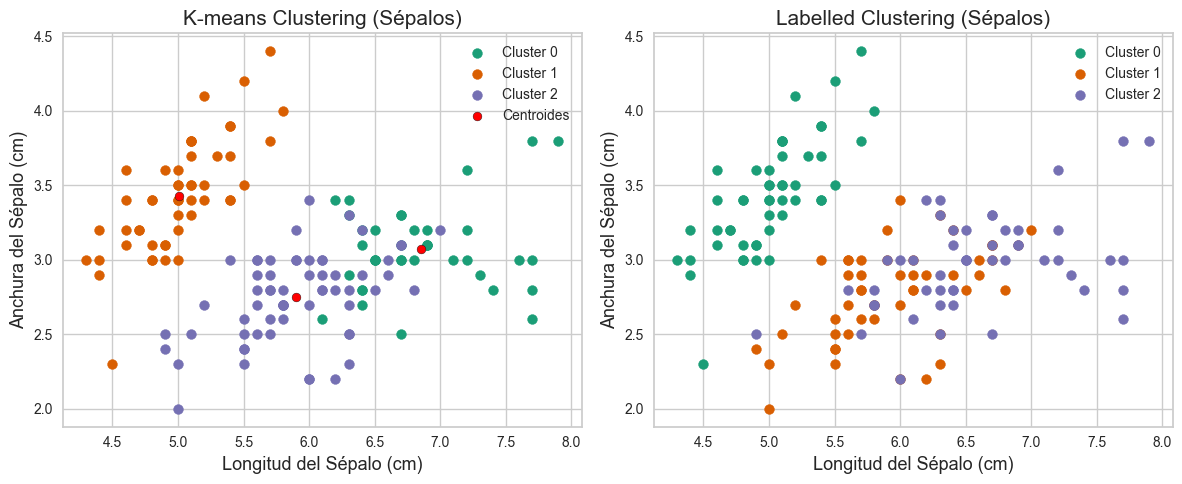

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
colors = plt.colormaps['Dark2']
unique_labels = set(groups)

# Gráfico 1. KMEANS para sépalos
for i, label_value in enumerate(unique_labels):
    cluster_mask = (groups == label_value)
    ax1.scatter(df.loc[cluster_mask, "sepal_length"], df.loc[cluster_mask, "sepal_width"], color=colors(i), label=f'Cluster {label_value}', s=50)

ax1.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=40, color='red', edgecolor='k', label='Centroides')

ax1.set_title("K-means Clustering (Sépalos)", fontsize=15)
ax1.set_xlabel('Longitud del Sépalo (cm)', fontsize=13)
ax1.set_ylabel('Anchura del Sépalo (cm)', fontsize=13)
ax1.grid(True)
ax1.legend()

# Gráfico 2. Datos con etiquetas de cluster para sépalos
labels = iris.target
unique_labels = set(labels)

for i, label in enumerate(unique_labels):
    cluster_mask = (labels == label)
    ax2.scatter(df.loc[cluster_mask, "sepal_length"], df.loc[cluster_mask, "sepal_width"], color=colors(i), label=f'Cluster {label}', s=50)

ax2.set_title("Labelled Clustering (Sépalos)", fontsize=15)
ax2.set_xlabel('Longitud del Sépalo (cm)', fontsize=13)
ax2.set_ylabel('Anchura del Sépalo (cm)', fontsize=13)
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

## 6. Detección de outliers

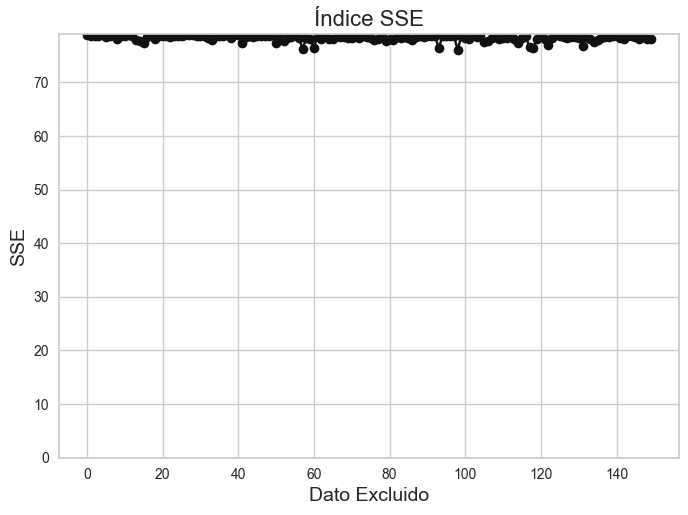

,Index,SSE
0,57,76.301621
1,60,76.453097
2,93,76.414080
3,98,76.048506
4,117,76.567346
5,118,76.384978
6,122,77.044188
7,131,76.711820


In [9]:
# import numpy as np # type: ignore
# import pandas as pd # type: ignore
# import matplotlib.pyplot as plt # type: ignore
# from sklearn.cluster import KMeans # type: ignore

# N_INIT = 10 
# RANDOM_STATE = 100  
# N = df.shape[0] # Calcular el número de filas en el DataFrame
# K = groups.max() + 1  # Se suma 1 porque los índices de los clusters empiezan en 0

# # Calcular SSE excluyendo cada observación
# SSE = []
# for excluded in range(N):
#     # Eliminar la observación i
#     X_without_excluded = np.delete(df, excluded, axis=0)
    
#     # Aplicar K-medias a X_sin_i y obtener el índice SSE
#     model = KMeans(n_clusters=K, n_init=N_INIT, random_state=RANDOM_STATE).fit(X_without_excluded)
#     SSE.append(model.inertia_)

# # Detección visual de outliers
# plt.plot(np.arange(N), SSE, "ko-") #  generar los valores de x, donde N representa el número de observaciones en el conjunto de datos.
# plt.title("Índice SSE", fontsize=16)  
# plt.xlabel("Datos", fontsize=14)  
# plt.ylabel("SSE", fontsize=14)  
# plt.ylim(bottom=0)  # Límite inferior del eje y para asegurar que no se muestren valores negativos
# plt.show()

# # Detección analítica de outliers
# sigma = np.std(SSE)  # Calcular la desviación estándar de los valores SSE
# mu = np.mean(SSE)  # Calcular la media de los valores SSE
# umbral = 2  # Umbral para detectar outliers (2 para distribuciones normales)

# # Si la diferencia absoluta calculada es mayor que un múltiplo del umbral 
# # multiplicado por la desviación estándar (sigma) de los valores SSE, se considera que el índice i es un outlier.
# outliers = [i for i in range(N) if np.abs(SSE[i] - mu) > umbral * sigma] 

# # Crear DataFrame para mostrar los outliers
# outliers_df = pd.DataFrame({'Index': outliers, 'SSE': [SSE[idx] for idx in outliers]})
# outliers_df


## 7. Validación interna - Evaluación de los clústers generados

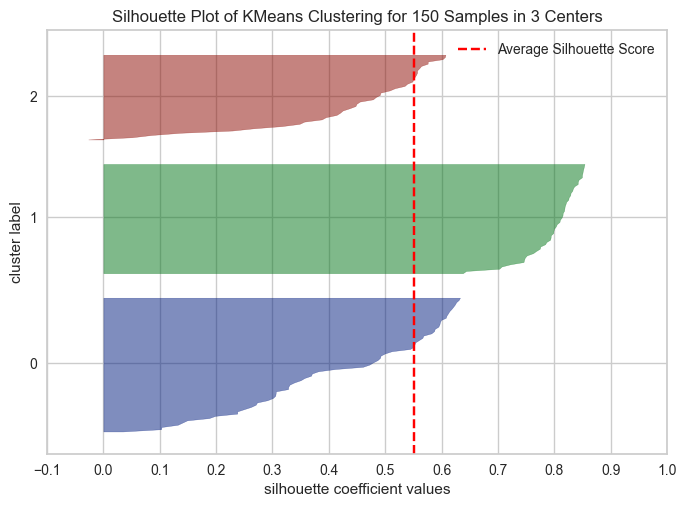

Silhouette Score: 0.553


In [10]:
from yellowbrick.cluster import SilhouetteVisualizer  # type: ignore
from sklearn.metrics import silhouette_score  # type: ignore
import warnings
warnings.filterwarnings("ignore")

visualizer = SilhouetteVisualizer(model, colors='sns_dark')
visualizer.fit(df)
visualizer.show()
plt.show()

print(f"Silhouette Score: {silhouette_score(df, groups):0.3}")

## 8. Validación externa - Comparación de los datos generados con 'ground truth'

In [12]:
external_validation_df = get_external_validation(groups, labels)
external_validation_df

,Medida,Valor
0,Homogeneidad,0.751485
1,Exhaustividad,0.764986
2,Media armónica,0.758176
3,Adjusted Rand Index,0.730238
4,Mutual Information,0.755119
